In [1]:
!pip install streamlit
!pip install pyngrok

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 57.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 79.0 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import streamlit as st
from datetime import datetime

In [4]:
#Loading the dataset
df_am12_bb20_rj43 = pd.read_csv('game_info.csv')

In [5]:
print("Shape of dataset:", df_am12_bb20_rj43.shape)
print("Columns:", df_am12_bb20_rj43.columns.tolist())
print("\nFirst 5 rows:")
print(df_am12_bb20_rj43.head())

Shape of dataset: (474417, 27)
Columns: ['id', 'slug', 'name', 'metacritic', 'released', 'tba', 'updated', 'website', 'rating', 'rating_top', 'playtime', 'achievements_count', 'ratings_count', 'suggestions_count', 'game_series_count', 'reviews_count', 'platforms', 'developers', 'genres', 'publishers', 'esrb_rating', 'added_status_yet', 'added_status_owned', 'added_status_beaten', 'added_status_toplay', 'added_status_dropped', 'added_status_playing']

First 5 rows:
      id            slug                   name  metacritic    released  \
0      1  dgeneration-hd        D/Generation HD         NaN  2015-10-23   
1     10         g-prime  G Prime Into The Rain         NaN  2016-01-06   
2    100    land-sliders           Land Sliders         NaN  2015-09-24   
3   1000      pixel-gear             Pixel Gear         NaN  2016-10-20   
4  10000  gods-and-idols         Gods and Idols         NaN  2016-12-12   

     tba              updated  \
0  False  2019-09-17T11:58:57   
1  False  2019

In [6]:
df_am12_bb20_rj43_dropped = df_am12_bb20_rj43.drop(['slug', 'tba', 'updated', 'playtime', 'website', 'suggestions_count', 'game_series_count', 'achievements_count', 'added_status_yet', 'added_status_owned', 'added_status_beaten', 'added_status_toplay', 'added_status_dropped','added_status_playing'], axis=1)
print("Shape of dataset after dropping columns:", df_am12_bb20_rj43_dropped.shape)

Shape of dataset after dropping columns: (474417, 13)


In [7]:
df_am12_bb20_rj43_dropped.head()

,id,name,metacritic,released,rating,rating_top,ratings_count,reviews_count,platforms,developers,genres,publishers,esrb_rating
0,1,D/Generation HD,NaN,2015-10-23,0.0,0,2,4,PC||macOS||Xbox One||PlayStation 4||Nintendo S...,West Coast Software,Adventure||Puzzle,West Coast Software,Everyone 10+
1,10,G Prime Into The Rain,NaN,2016-01-06,0.0,0,3,3,macOS||PC||Xbox One,Soma Games,Simulation||Indie,Immanitas Entertainment||Code-Monkeys,Everyone
2,100,Land Sliders,NaN,2015-09-24,0.0,0,2,2,iOS,Prettygreat Pty,Adventure||Arcade,Prettygreat Pty,Everyone 10+
3,1000,Pixel Gear,NaN,2016-10-20,0.0,0,0,0,PC||PlayStation 4,Oasis Games||Geronimo Interactive,Action||Indie,Geronimo Interactive,Teen
4,10000,Gods and Idols,NaN,2016-12-12,0.0,1,5,5,PC,Viking Tao,RPG||Strategy||Massively Multiplayer,Viking Tao,NaN


In [8]:
# Check for null values in each column
null_counts = df_am12_bb20_rj43_dropped.isnull().sum()
print("Null values per column:")
print(null_counts)

Null values per column:
id                    0
name                  3
metacritic       469684
released          24199
rating                0
rating_top            0
ratings_count         0
reviews_count         0
platforms          3986
developers         8366
genres           103185
publishers       333401
esrb_rating      418553
dtype: int64


In [9]:
# Drop rows with any null values
df_am12_bb20_rj43_cleaned = df_am12_bb20_rj43_dropped.dropna()

print("\nShape of dataset after dropping nulls:", df_am12_bb20_rj43_cleaned.shape)
df_am12_bb20_rj43_cleaned.head()



Shape of dataset after dropping nulls: (2397, 13)


,id,name,metacritic,released,rating,rating_top,ratings_count,reviews_count,platforms,developers,genres,publishers,esrb_rating
85,10008,Sudden Strike 4,77.0,2017-08-10,3.12,4,32,33,macOS||iOS||Linux||PC||PlayStation 4,Kalypso Media||Kite Games,Action||Strategy,Kalypso Media||Kalypso,Mature
207,10020,Arizona Sunshine,81.0,2016-12-06,3.76,4,42,42,PC||PlayStation 4,Vertigo Games||Jaywalkers Interactive,Action||Adventure||Indie,Vertigo Games,Adults Only
359,10035,HITMAN,83.0,2017-11-16,3.92,4,1371,1375,Linux||macOS||PC||Xbox One||PlayStation 4,Feral Interactive||Square Enix||IO Interactive,Action||Shooter,Square Enix||Feral Interactive||Warner Bros. I...,Adults Only
510,10049,Hitman: Codename 47,73.0,2000-11-19,3.87,4,367,367,PC,IO Interactive,Action||Shooter,Square Enix||Eidos Interactive,Mature
522,10050,Thief Gold,92.0,1998-11-29,4.13,5,173,173,PC,Looking Glass Studios,Action||Simulation,Square Enix,Mature


In [10]:
# 1. Create 'release_year' column
# Convert 'released' to datetime objects, coercing errors to NaT
df_am12_bb20_rj43_cleaned['released'] = pd.to_datetime(df_am12_bb20_rj43_cleaned['released'], errors='coerce')

# Extract the year, handle potential NaT values by filling with 0
df_am12_bb20_rj43_cleaned['release_year'] = df_am12_bb20_rj43_cleaned['released'].dt.year.fillna(0).astype(int)

# 2. Create 'game_age' column
# Assuming the current year is 2025 for calculating game age
df_am12_bb20_rj43_cleaned['game_age'] = 2025 - df_am12_bb20_rj43_cleaned['release_year']

# Handle cases where release_year was 0 (due to NaT in 'released')
df_am12_bb20_rj43_cleaned.loc[df_am12_bb20_rj43_cleaned['release_year'] == 0, 'game_age'] = np.nan

print("DataFrame with 'release_year' and 'game_age':")
display(df_am12_bb20_rj43_cleaned[['released', 'release_year', 'game_age']].head())

DataFrame with 'release_year' and 'game_age':


/tmp/ipython-input-4264186311.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_am12_bb20_rj43_cleaned['released'] = pd.to_datetime(df_am12_bb20_rj43_cleaned['released'], errors='coerce')
/tmp/ipython-input-4264186311.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_am12_bb20_rj43_cleaned['release_year'] = df_am12_bb20_rj43_cleaned['released'].dt.year.fillna(0).astype(int)
/tmp/ipython-input-4264186311.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

,released,release_year,game_age
85,2017-08-10,2017,8.0
207,2016-12-06,2016,9.0
359,2017-11-16,2017,8.0
510,2000-11-19,2000,25.0
522,1998-11-29,1998,27.0


In [11]:
# 3. Create 'metacritic_category' column
# Define bins and labels for metacritic scores
metacritic_bins = [0, 50, 80, 100]
metacritic_labels = ['low', 'medium', 'high']

df_am12_bb20_rj43_cleaned['metacritic_category'] = pd.cut(df_am12_bb20_rj43_cleaned['metacritic'], bins=metacritic_bins, labels=metacritic_labels, right=False)

print("\nDataFrame with 'metacritic_category':")
display(df_am12_bb20_rj43_cleaned[['metacritic', 'metacritic_category']].head())


DataFrame with 'metacritic_category':


/tmp/ipython-input-460707189.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_am12_bb20_rj43_cleaned['metacritic_category'] = pd.cut(df_am12_bb20_rj43_cleaned['metacritic'], bins=metacritic_bins, labels=metacritic_labels, right=False)


,metacritic,metacritic_category
85,77.0,medium
207,81.0,high
359,83.0,high
510,73.0,medium
522,92.0,high


In [12]:
# 4. Create 'ratings_category' column
# Define bins and labels for ratings (assuming rating is on a scale of 0-5)
ratings_bins = [0, 2, 4, 5.1] # Adding a small value to include 5.0
ratings_labels = ['low', 'medium', 'high']

df_am12_bb20_rj43_cleaned['ratings_category'] = pd.cut(df_am12_bb20_rj43_cleaned['rating'], bins=ratings_bins, labels=ratings_labels, right=False)

print("\nDataFrame with 'ratings_category':")
display(df_am12_bb20_rj43_cleaned[['rating', 'ratings_category']].head())


DataFrame with 'ratings_category':


/tmp/ipython-input-1646889731.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_am12_bb20_rj43_cleaned['ratings_category'] = pd.cut(df_am12_bb20_rj43_cleaned['rating'], bins=ratings_bins, labels=ratings_labels, right=False)


,rating,ratings_category
85,3.12,medium
207,3.76,medium
359,3.92,medium
510,3.87,medium
522,4.13,high


In [13]:
# 5. Create 'genre_count' column
# Split the 'genres' string by '||' and count the number of genres
df_am12_bb20_rj43_cleaned['genre_count'] = df_am12_bb20_rj43_cleaned['genres'].str.split('\|\|').str.len()

# Create buckets for single and multiple genres
df_am12_bb20_rj43_cleaned['genre_count_category'] = df_am12_bb20_rj43_cleaned['genre_count'].apply(lambda x: 'single' if x == 1 else 'multiple')

print("\nDataFrame with 'genre_count' and 'genre_count_category':")
display(df_am12_bb20_rj43_cleaned[['genres', 'genre_count', 'genre_count_category']].head())


DataFrame with 'genre_count' and 'genre_count_category':


<>:3: SyntaxWarning: invalid escape sequence '\|'
<>:3: SyntaxWarning: invalid escape sequence '\|'
/tmp/ipython-input-2635925446.py:3: SyntaxWarning: invalid escape sequence '\|'
  df_am12_bb20_rj43_cleaned['genre_count'] = df_am12_bb20_rj43_cleaned['genres'].str.split('\|\|').str.len()
/tmp/ipython-input-2635925446.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_am12_bb20_rj43_cleaned['genre_count'] = df_am12_bb20_rj43_cleaned['genres'].str.split('\|\|').str.len()
/tmp/ipython-input-2635925446.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

,genres,genre_count,genre_count_category
85,Action||Strategy,2,multiple
207,Action||Adventure||Indie,3,multiple
359,Action||Shooter,2,multiple
510,Action||Shooter,2,multiple
522,Action||Simulation,2,multiple


In [14]:
df_am12_bb20_rj43_cleaned.head()

,id,name,metacritic,released,rating,rating_top,ratings_count,reviews_count,platforms,developers,genres,publishers,esrb_rating,release_year,game_age,metacritic_category,ratings_category,genre_count,genre_count_category
85,10008,Sudden Strike 4,77.0,2017-08-10,3.12,4,32,33,macOS||iOS||Linux||PC||PlayStation 4,Kalypso Media||Kite Games,Action||Strategy,Kalypso Media||Kalypso,Mature,2017,8.0,medium,medium,2,multiple
207,10020,Arizona Sunshine,81.0,2016-12-06,3.76,4,42,42,PC||PlayStation 4,Vertigo Games||Jaywalkers Interactive,Action||Adventure||Indie,Vertigo Games,Adults Only,2016,9.0,high,medium,3,multiple
359,10035,HITMAN,83.0,2017-11-16,3.92,4,1371,1375,Linux||macOS||PC||Xbox One||PlayStation 4,Feral Interactive||Square Enix||IO Interactive,Action||Shooter,Square Enix||Feral Interactive||Warner Bros. I...,Adults Only,2017,8.0,high,medium,2,multiple
510,10049,Hitman: Codename 47,73.0,2000-11-19,3.87,4,367,367,PC,IO Interactive,Action||Shooter,Square Enix||Eidos Interactive,Mature,2000,25.0,medium,medium,2,multiple
522,10050,Thief Gold,92.0,1998-11-29,4.13,5,173,173,PC,Looking Glass Studios,Action||Simulation,Square Enix,Mature,1998,27.0,high,high,2,multiple


In [15]:
categorical_cols = df_am12_bb20_rj43_cleaned.select_dtypes(include=['object', 'category']).columns.tolist()
non_categorical_cols = df_am12_bb20_rj43_cleaned.select_dtypes(exclude=['object', 'category']).columns.tolist()

print("Categorical variables:")
print(categorical_cols)

print("\nNon-categorical variables:")
print(non_categorical_cols)

Categorical variables:
['name', 'platforms', 'developers', 'genres', 'publishers', 'esrb_rating', 'metacritic_category', 'ratings_category', 'genre_count_category']

Non-categorical variables:
['id', 'metacritic', 'released', 'rating', 'rating_top', 'ratings_count', 'reviews_count', 'release_year', 'game_age', 'genre_count']


#Queries regarding dataframe

Query 1: Which is the most highly rated game of all time according to this file?

In [16]:
# Find the game with the highest metacritic score
df_am12_bb20_rj43_highest_metacritic_game = df_am12_bb20_rj43_cleaned.loc[df_am12_bb20_rj43_cleaned['metacritic'].idxmax()]

print("Game with the highest Metacritic score:")
display(df_am12_bb20_rj43_highest_metacritic_game[['name', 'metacritic','release_year','publishers']])

# Find the game with the highest rating
df_am12_bb20_rj43_highest_rating_game = df_am12_bb20_rj43_cleaned.loc[df_am12_bb20_rj43_cleaned['rating'].idxmax()]

print("\nGame with the highest rating:")
display(df_am12_bb20_rj43_highest_rating_game[['name', 'rating','release_year','publishers']])

Game with the highest Metacritic score:


,152424
name,The Legend of Zelda: Ocarina of Time
metacritic,99.0
release_year,1998
publishers,Nintendo



Game with the highest rating:


,240990
name,Persona 5 Royal
rating,4.81
release_year,2020
publishers,SEGA||Atlus


Query 2: List all games that the critics and audiences loved alike.

In [17]:
# Filter for games with high metacritic_category and high ratings_category
df_am12_bb20_rj43_loved_games = df_am12_bb20_rj43_cleaned[(df_am12_bb20_rj43_cleaned['metacritic_category'] == 'high') & (df_am12_bb20_rj43_cleaned['ratings_category'] == 'high')]

# Display the names of these games
print("Games loved by both critics and audiences:")
display(df_am12_bb20_rj43_loved_games[['name','metacritic','rating']])

Games loved by both critics and audiences:


,name,metacritic,rating
522,Thief Gold,92.0,4.13
668,Assassin’s Creed Brotherhood,88.0,4.21
678,Cities: Skylines,85.0,4.15
1041,Transistor,83.0,4.18
1477,NieR:Automata,86.0,4.34
...,...,...,...
463158,Forza Horizon 3,88.0,4.35
464177,BlazBlue: Central Fiction,85.0,4.04
466470,Titanfall 2,87.0,4.31
469744,Deep Rock Galactic,84.0,4.13


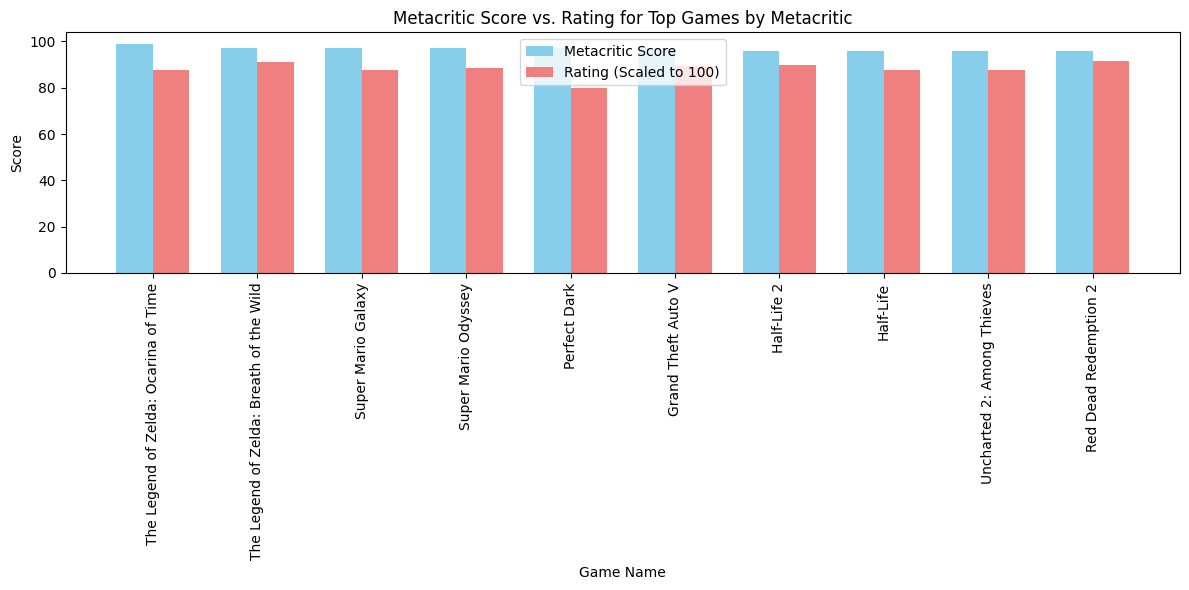

In [18]:
# Select a subset of games for visualization (e.g., top 10 by metacritic score)
top_games_metacritic = df_am12_bb20_rj43_cleaned.nlargest(10, 'metacritic')

# Create a bar graph comparing metacritic and rating
fig, ax = plt.subplots(figsize=(12, 6))

bar_width = 0.35
index = np.arange(len(top_games_metacritic))

bar1 = ax.bar(index, top_games_metacritic['metacritic'], bar_width, label='Metacritic Score', color='skyblue')
bar2 = ax.bar(index + bar_width, top_games_metacritic['rating'] * 20, bar_width, label='Rating (Scaled to 100)', color='lightcoral') # Scale rating to compare with metacritic

ax.set_xlabel('Game Name')
ax.set_ylabel('Score')
ax.set_title('Metacritic Score vs. Rating for Top Games by Metacritic')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(top_games_metacritic['name'], rotation=90)
ax.legend()

plt.tight_layout()
plt.show()

Query 3: Publishers with the highest number of games published over the years.

In [19]:
# Count the number of games per publisher
df_am12_bb20_rj43_publisher_counts = df_am12_bb20_rj43_cleaned['publishers'].value_counts()

# Display the top publishers
print("Publishers with the highest number of games published:")
display(df_am12_bb20_rj43_publisher_counts.head(10)) # Displaying the top 10 publishers

Publishers with the highest number of games published:


,count
publishers,
Electronic Arts,136
Ubisoft Entertainment,105
Nintendo,85
Activision Blizzard,65
Capcom,61
Square Enix,59
SEGA,57
Sony Computer Entertainment,52
Microsoft Studios,45


/tmp/ipython-input-2532153937.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_publishers.index, y=top_publishers.values, palette='viridis')


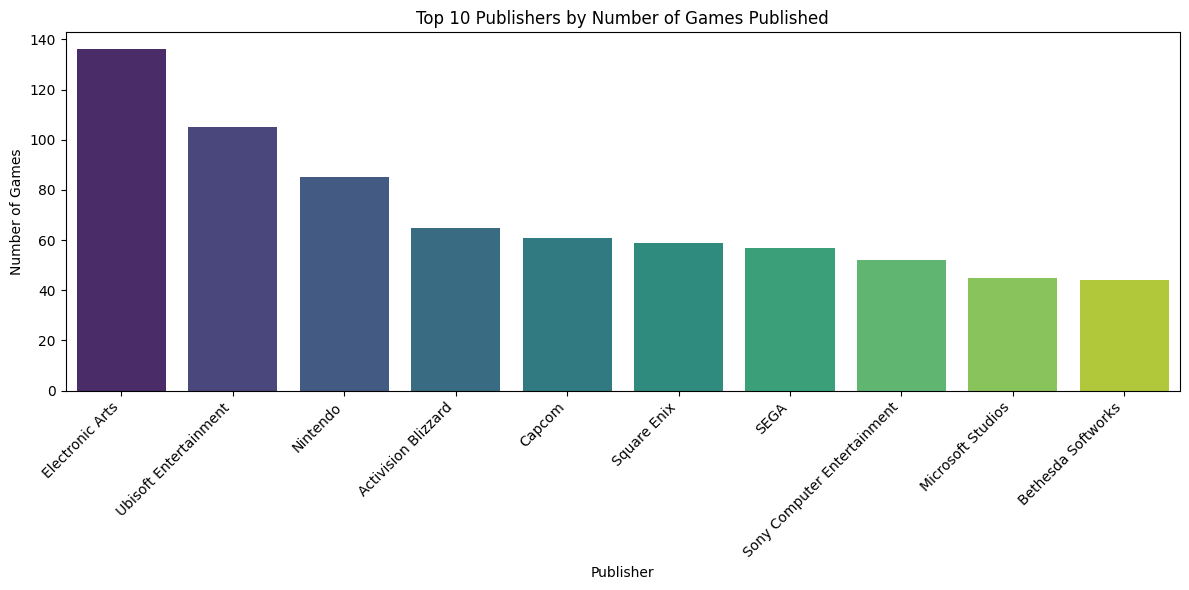

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the top N publishers (e.g., top 10)
top_n = 10
top_publishers = df_am12_bb20_rj43_publisher_counts.head(top_n)

# Create a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=top_publishers.index, y=top_publishers.values, palette='viridis')
plt.title(f'Top {top_n} Publishers by Number of Games Published')
plt.xlabel('Publisher')
plt.ylabel('Number of Games')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Query 4: Number of games published every year.

Number of games published every year:


,count
release_year,
1980,1
1991,2
1992,2
1993,2
1994,1
1995,1
1996,4
1997,7
1998,11


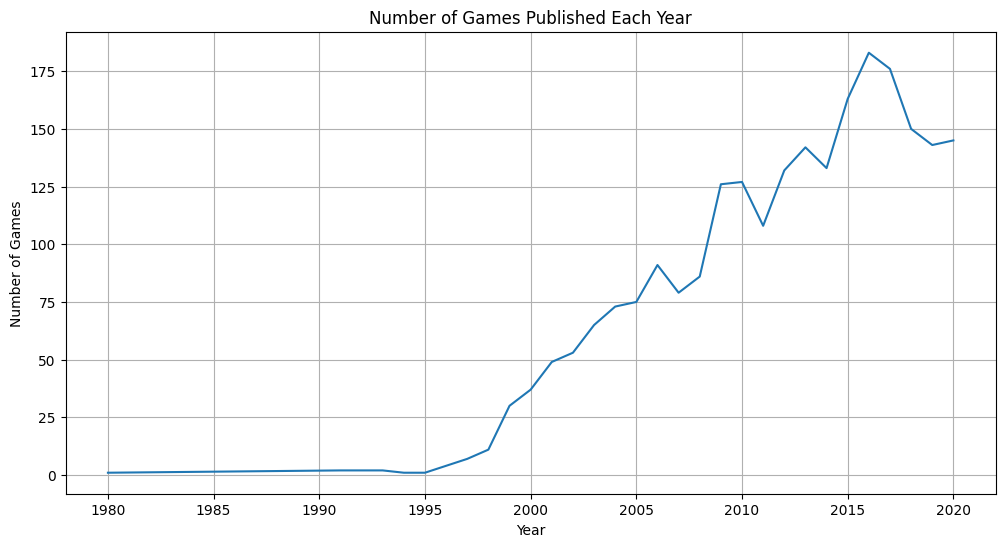

In [21]:
# Count the number of games published each year
games_per_year = df_am12_bb20_rj43_cleaned['release_year'].value_counts().sort_index()

# Filter out the year 0, which represents missing release dates
games_per_year = games_per_year[games_per_year.index != 0]

# Display the count of games published each year
print("Number of games published every year:")
display(games_per_year)

# Create a line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x=games_per_year.index, y=games_per_year.values)
plt.title('Number of Games Published Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Games')
plt.grid(True)
plt.show()

Query 5: Average Metacritic and Audience ratings over the years

,metacritic,rating,rating_scaled
release_year,,,
1980,62.000000,4.110000,82.200000
1991,81.000000,4.105000,82.100000
1992,81.000000,2.125000,42.500000
1993,76.000000,4.270000,85.400000
1994,83.000000,4.370000,87.400000
1995,25.000000,2.920000,58.400000
1996,78.250000,4.112500,82.250000
1997,79.571429,3.812857,76.257143
1998,89.454545,3.814545,76.290909


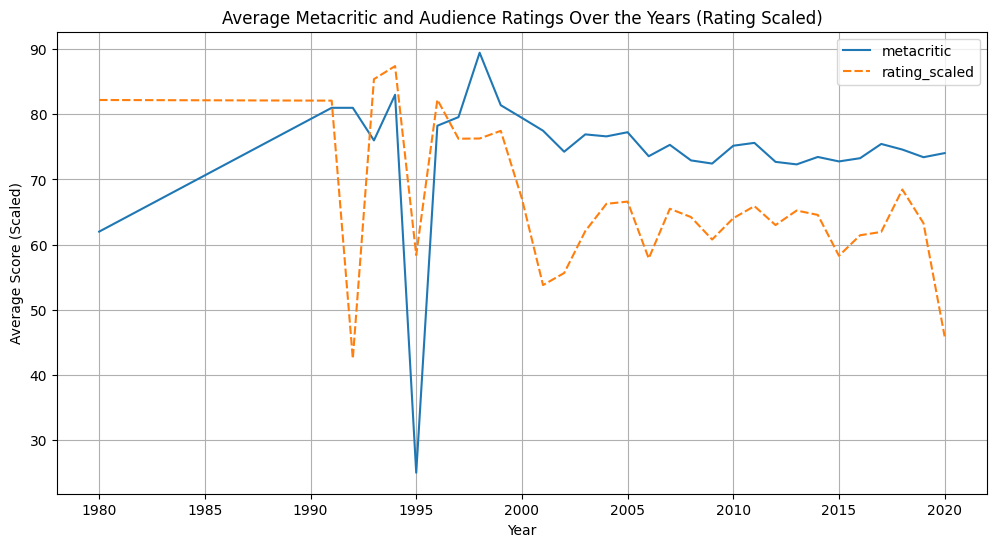

In [22]:
# Calculate the average metacritic and rating per year
average_scores_per_year = df_am12_bb20_rj43_cleaned.groupby('release_year')[['metacritic', 'rating']].mean()

# Filter out the year 0
average_scores_per_year = average_scores_per_year[average_scores_per_year.index != 0].copy() # Add .copy() to avoid SettingWithCopyWarning

# Scale the rating to match metacritic (multiply by 20)
average_scores_per_year['rating_scaled'] = average_scores_per_year['rating'] * 20

display(average_scores_per_year)

# Create a line plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=average_scores_per_year[['metacritic', 'rating_scaled']]) # Plot metacritic and scaled rating
plt.title('Average Metacritic and Audience Ratings Over the Years (Rating Scaled)')
plt.xlabel('Year')
plt.ylabel('Average Score (Scaled)')
plt.grid(True)
plt.show()

Query 6: List all games from the years 1992, 1994, 1995, 1998 along with their metacritic and audience ratings

In [23]:
# Define the list of years to filter by
years_of_interest = [1992, 1994, 1995, 1998]

# Filter the DataFrame for games released in the specified years
games_from_specific_years = df_am12_bb20_rj43_cleaned[df_am12_bb20_rj43_cleaned['release_year'].isin(years_of_interest)].copy()

# Sort by release year in ascending order
games_from_specific_years = games_from_specific_years.sort_values(by='release_year')

# Group by release year and display games within each year
print(f"Games from the years {years_of_interest}, grouped by release year:")
for year, games in games_from_specific_years.groupby('release_year'):
    print(f"\n--- Year: {year} ---")
    display(games[['name', 'metacritic', 'rating']])

Games from the years [1992, 1994, 1995, 1998], grouped by release year:

--- Year: 1992 ---


,name,metacritic,rating
154127,DRAGON QUEST V,90.0,4.25
132891,Alone in the Dark: The Trilogy 1+2+3,72.0,0.00



--- Year: 1994 ---


,name,metacritic,rating
84808,DOOM II,83.0,4.37



--- Year: 1995 ---


,name,metacritic,rating
194146,Dragon Ball Z: Ultimate Battle 22,25.0,2.92



--- Year: 1998 ---


,name,metacritic,rating
128989,Shogo: Mobile Armor Division,88.0,3.97
85934,Half-Life,96.0,4.38
152424,The Legend of Zelda: Ocarina of Time,99.0,4.39
522,Thief Gold,92.0,4.13
185528,Banjo-Kazooie,92.0,4.29
215039,Baldur's Gate,91.0,4.35
228284,Soul Caliber,76.0,0.00
433401,Tom Clancy's Rainbow Six,85.0,3.68
434219,Crash Bandicoot 3: Warped,91.0,4.33
437804,Metal Gear Solid,94.0,4.44


Inference:
* **Varied Success in the Early to Mid-90s**: The data for these specific years
shows a mix of highly-rated and lower-rated games. This suggests that while there were successful titles with high critical and audience acclaim (like DRAGON QUEST V, DOOM II, Half-Life, and The Legend of Zelda: Ocarina of Time), there were also games that did not resonate as well with critics or audiences (Alone in the Dark: The Trilogy 1+2+3, Dragon Ball Z: Ultimate Battle 22, Soul Caliber). This highlights the inherent risk in game development and the variability of success even within a few years of each other.
* **Potential for Breakthrough Years**: 1998 stands out with a significantly higher number of listed games compared to the other years, and several of these games received very high metacritic and audience ratings. This suggests that 1998 might have been a particularly strong year for game releases and potentially a period of significant innovation or market growth.
* **Importance of Both Critical and Audience Reception**: While some games had high metacritic scores but lower audience ratings (or vice versa), several titles in 1998 managed to achieve high scores in both categories (Half-Life, The Legend of Zelda: Ocarina of Time, Thief Gold, Banjo-Kazooie, Baldur's Gate, Crash Bandicoot 3: Warped, Metal Gear Solid, Star Ocean: The Second Story). This reinforces the importance of developing games that appeal to both critics and the broader audience for widespread success and positive reception.
* **Genre Diversity**: Even within these few years, the listed games represent a variety of genres (RPG, Adventure, Action, Shooter, Simulation). This indicates a developing and diversifying market during this period, suggesting opportunities in different game types.

In [ ]:
df_am12_bb20_rj43_cleaned.to_csv('cleaned_game_info.csv', index=False)

In [ ]:
from google.colab import files
files.download('cleaned_game_info.csv')

In [30]:
%%writefile app.py
import streamlit as st
import pandas as pd
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

st.title('Game Data Analysis')

# Load the cleaned data
try:
    df_am12_bb20_rj43_cleaned = pd.read_csv('cleaned_game_info.csv')
    # Ensure the 'released' column is datetime and create 'release_year' if not already there
    df_am12_bb20_rj43_cleaned['released'] = pd.to_datetime(df_am12_bb20_rj43_cleaned['released'], errors='coerce')
    df_am12_bb20_rj43_cleaned['release_year'] = df_am12_bb20_rj43_cleaned['released'].dt.year.fillna(0).astype(int)
    # Ensure metacritic_category and ratings_category are present and correct
    metacritic_bins = [0, 50, 80, 100]
    metacritic_labels = ['low', 'medium', 'high']
    df_am12_bb20_rj43_cleaned['metacritic_category'] = pd.cut(df_am12_bb20_rj43_cleaned['metacritic'], bins=metacritic_bins, labels=metacritic_labels, right=False)
    ratings_bins = [0, 2, 4, 5.1]
    ratings_labels = ['low', 'medium', 'high']
    df_am12_bb20_rj43_cleaned['ratings_category'] = pd.cut(df_am12_bb20_rj43_cleaned['rating'], bins=ratings_bins, labels=ratings_labels, right=False)

except FileNotFoundError:
    st.error("cleaned_game_info.csv not found. Please run the data cleaning steps first.")
    st.stop()

st.header('Metacritic Score vs. Rating Comparison for Top Games')

# Select a subset of games for visualization (e.g., top 10 by metacritic score)
top_games_metacritic = df_am12_bb20_rj43_cleaned.nlargest(10, 'metacritic')

# Create a bar chart using Plotly
fig_plotly_scores = go.Figure(data=[
    go.Bar(name='Metacritic Score', x=top_games_metacritic['name'], y=top_games_metacritic['metacritic'], marker_color='skyblue'),
    go.Bar(name='Rating (Scaled to 100)', x=top_games_metacritic['name'], y=top_games_metacritic['rating'] * 20, marker_color='lightcoral')
])

# Change the layout to have bars side-by-side
fig_plotly_scores.update_layout(barmode='group', xaxis_tickangle=-45, title='Metacritic Score vs. Rating for Top Games by Metacritic')
st.plotly_chart(fig_plotly_scores, use_container_width=True)

st.header('Top Publishers by Number of Games Published')

# Count the number of games per publisher
df_am12_bb20_rj43_publisher_counts = df_am12_bb20_rj43_cleaned['publishers'].value_counts()

# Get the top N publishers (e.g., top 10)
top_n = 10
top_publishers = df_am12_bb20_rj43_publisher_counts.head(top_n)

# Create a bar chart using seaborn
plt.figure(figsize=(10, 5)) # Adjust figure size for better display in Streamlit
sns.barplot(x=top_publishers.index, y=top_publishers.values, palette='viridis')
plt.title(f'Top {top_n} Publishers by Number of Games Published')
plt.xlabel('Publisher')
plt.ylabel('Number of Games')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
st.pyplot(plt) # Display the matplotlib plot

st.header('Number of Games Published Each Year')

# Count the number of games published each year
games_per_year = df_am12_bb20_rj43_cleaned['release_year'].value_counts().sort_index()

# Filter out the year 0, which represents missing release dates
games_per_year = games_per_year[games_per_year.index != 0]

# Create a line plot using seaborn
plt.figure(figsize=(10, 5)) # Adjust figure size
sns.lineplot(x=games_per_year.index, y=games_per_year.values)
plt.title('Number of Games Published Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Games')
plt.grid(True)
st.pyplot(plt) # Display the matplotlib plot

st.header('Average Metacritic and Audience Ratings Over the Years')

# Calculate the average metacritic and rating per year
average_scores_per_year = df_am12_bb20_rj43_cleaned.groupby('release_year')[['metacritic', 'rating']].mean()

# Filter out the year 0
average_scores_per_year = average_scores_per_year[average_scores_per_year.index != 0].copy()

# Scale the rating to match metacritic (multiply by 20)
average_scores_per_year['rating_scaled'] = average_scores_per_year['rating'] * 20

# Create a line plot using seaborn
plt.figure(figsize=(10, 5)) # Adjust figure size
sns.lineplot(data=average_scores_per_year[['metacritic', 'rating_scaled']])
plt.title('Average Metacritic and Audience Ratings Over the Years (Rating Scaled)')
plt.xlabel('Year')
plt.ylabel('Average Score (Scaled)')
plt.grid(True)
st.pyplot(plt) # Display the matplotlib plot

# Add sections for other visualizations (assuming they exist or need to be added based on analysis)
# Example: Sales Distribution by Genre (assuming 'sales' and 'genres' columns and plot data available)
# If you had a sales distribution by genre plot data, you would include it here:
# try:
#     fig_plotly_genre = ... # Plotly figure for genre distribution
#     st.header('Sales Distribution by Genre')
#     st.plotly_chart(fig_plotly_genre, use_container_width=True)
# except NameError:
#     st.info("Sales distribution by genre data not found.")

# Example: Sales Distribution by Platform (assuming 'sales' and 'platforms' columns and plot data available)
# If you had a sales distribution by platform plot data, you would include it here:
# try:
#     fig_plotly_platform = ... # Plotly figure for platform distribution
#     st.header('Sales Distribution by Platform')
#     st.plotly_chart(fig_plotly_platform, use_container_width=True)
# except NameError:
#     st.info("Sales distribution by platform data not found.")

Overwriting app.py


In [31]:
%%writefile app.py
import streamlit as st
import pandas as pd
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

st.title('Game Data Analysis')

# Load the cleaned data
try:
    df_am12_bb20_rj43_cleaned = pd.read_csv('cleaned_game_info.csv')
    # Ensure the 'released' column is datetime and create 'release_year' if not already there
    df_am12_bb20_rj43_cleaned['released'] = pd.to_datetime(df_am12_bb20_rj43_cleaned['released'], errors='coerce')
    df_am12_bb20_rj43_cleaned['release_year'] = df_am12_bb20_rj43_cleaned['released'].dt.year.fillna(0).astype(int)
    # Ensure metacritic_category and ratings_category are present and correct
    metacritic_bins = [0, 50, 80, 100]
    metacritic_labels = ['low', 'medium', 'high']
    df_am12_bb20_rj43_cleaned['metacritic_category'] = pd.cut(df_am12_bb20_rj43_cleaned['metacritic'], bins=metacritic_bins, labels=metacritic_labels, right=False)
    ratings_bins = [0, 2, 4, 5.1]
    ratings_labels = ['low', 'medium', 'high']
    df_am12_bb20_rj43_cleaned['ratings_category'] = pd.cut(df_am12_bb20_rj43_cleaned['rating'], bins=ratings_bins, labels=ratings_labels, right=False)

except FileNotFoundError:
    st.error("cleaned_game_info.csv not found. Please run the data cleaning steps first.")
    st.stop()

st.header('Metacritic Score vs. Rating Comparison for Top Games')

# Select a subset of games for visualization (e.g., top 10 by metacritic score)
top_games_metacritic = df_am12_bb20_rj43_cleaned.nlargest(10, 'metacritic')

# Create a bar chart using Plotly
fig_plotly_scores = go.Figure(data=[
    go.Bar(name='Metacritic Score', x=top_games_metacritic['name'], y=top_games_metacritic['metacritic'], marker_color='skyblue'),
    go.Bar(name='Rating (Scaled to 100)', x=top_games_metacritic['name'], y=top_games_metacritic['rating'] * 20, marker_color='lightcoral')
])

# Change the layout to have bars side-by-side
fig_plotly_scores.update_layout(barmode='group', xaxis_tickangle=-45, title='Metacritic Score vs. Rating for Top Games by Metacritic')
st.plotly_chart(fig_plotly_scores, use_container_width=True)

st.header('Top Publishers by Number of Games Published')

# Count the number of games per publisher
df_am12_bb20_rj43_publisher_counts = df_am12_bb20_rj43_cleaned['publishers'].value_counts()

# Get the top N publishers (e.g., top 10)
top_n = 10
top_publishers = df_am12_bb20_rj43_publisher_counts.head(top_n)

# Create a bar chart using seaborn
plt.figure(figsize=(10, 5)) # Adjust figure size for better display in Streamlit
sns.barplot(x=top_publishers.index, y=top_publishers.values, palette='viridis')
plt.title(f'Top {top_n} Publishers by Number of Games Published')
plt.xlabel('Publisher')
plt.ylabel('Number of Games')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
st.pyplot(plt) # Display the matplotlib plot

st.header('Number of Games Published Each Year')

# Count the number of games published each year
games_per_year = df_am12_bb20_rj43_cleaned['release_year'].value_counts().sort_index()

# Filter out the year 0, which represents missing release dates
games_per_year = games_per_year[games_per_year.index != 0]

# Create a line plot using seaborn
plt.figure(figsize=(10, 5)) # Adjust figure size
sns.lineplot(x=games_per_year.index, y=games_per_year.values)
plt.title('Number of Games Published Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Games')
plt.grid(True)
st.pyplot(plt) # Display the matplotlib plot

st.header('Average Metacritic and Audience Ratings Over the Years')

# Calculate the average metacritic and rating per year
average_scores_per_year = df_am12_bb20_rj43_cleaned.groupby('release_year')[['metacritic', 'rating']].mean()

# Filter out the year 0
average_scores_per_year = average_scores_per_year[average_scores_per_year.index != 0].copy()

# Scale the rating to match metacritic (multiply by 20)
average_scores_per_year['rating_scaled'] = average_scores_per_year['rating'] * 20

# Create a line plot using seaborn
plt.figure(figsize=(10, 5)) # Adjust figure size
sns.lineplot(data=average_scores_per_year[['metacritic', 'rating_scaled']])
plt.title('Average Metacritic and Audience Ratings Over the Years (Rating Scaled)')
plt.xlabel('Year')
plt.ylabel('Average Score (Scaled)')
plt.grid(True)
st.pyplot(plt) # Display the matplotlib plot

# Add sections for other visualizations (assuming they exist or need to be added based on analysis)
# Example: Sales Distribution by Genre (assuming 'sales' and 'genres' columns and plot data available)
# If you had a sales distribution by genre plot data, you would include it here:
# try:
#     fig_plotly_genre = ... # Plotly figure for genre distribution
#     st.header('Sales Distribution by Genre')
#     st.plotly_chart(fig_plotly_genre, use_container_width=True)
# except NameError:
#     st.info("Sales distribution by genre data not found.")

# Example: Sales Distribution by Platform (assuming 'sales' and 'platforms' columns and plot data available)
# If you had a sales distribution by platform plot data, you would include it here:
# try:
#     fig_plotly_platform = ... # Plotly figure for platform distribution
#     st.header('Sales Distribution by Platform')
#     st.plotly_chart(fig_plotly_platform, use_container_width=True)
# except NameError:
#     st.info("Sales distribution by platform data not found.")

Overwriting app.py


In [32]:
from pyngrok import ngrok
import subprocess
import os
from google.colab import userdata

# Terminate open tunnels if any
ngrok.kill()

# Set ngrok authtoken
ngrok.set_auth_token(userdata.get('NGROK_AUTH_TOKEN'))

# Set up a tunnel to the streamlit port 8501
ngrok_tunnel = ngrok.connect(8501)
print(f'Streamlit App URL: {ngrok_tunnel.public_url}')

# Run the streamlit app in the background
subprocess.Popen(['streamlit', 'run', 'app.py'], stdout=subprocess.DEVNULL, stderr=subprocess.DEVNULL)

Streamlit App URL: https://61d41fb64d0e.ngrok-free.app


<Popen: returncode: None args: ['streamlit', 'run', 'app.py']>